# Name: Swati

# Task 4 - Prediction using Decision Tree Algorithm

## Predict the right class for new data using decision tree classifier and visualize classification

### Importing required libraries

In [584]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

### Importing dataset

In [585]:
data = pd.read_csv('Iris.csv')

In [586]:
# Printing dataset 
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [587]:
# To check the overview of our dataset, we use info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### To check missing values

In [588]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [589]:
# To check number of rows and columns, we use 'shape'
data.shape

(150, 6)

In [590]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [591]:
# dropping Id column
data.drop("Id",inplace=True,axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### To check correlation

In [592]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Heatmap for correlation plot

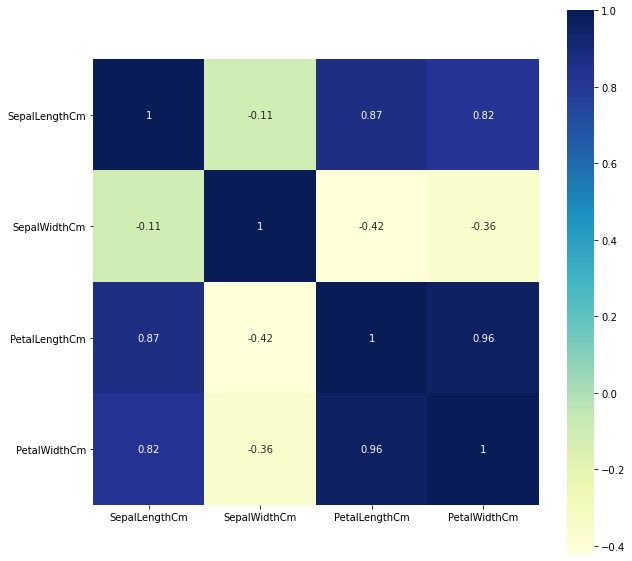

In [593]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,square=True,cmap='YlGnBu')
plt.yticks(rotation=0);

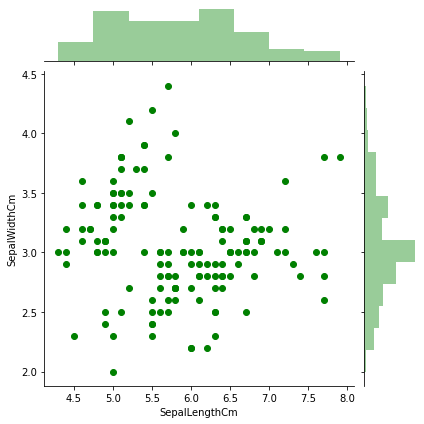

In [594]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=data,color='green')

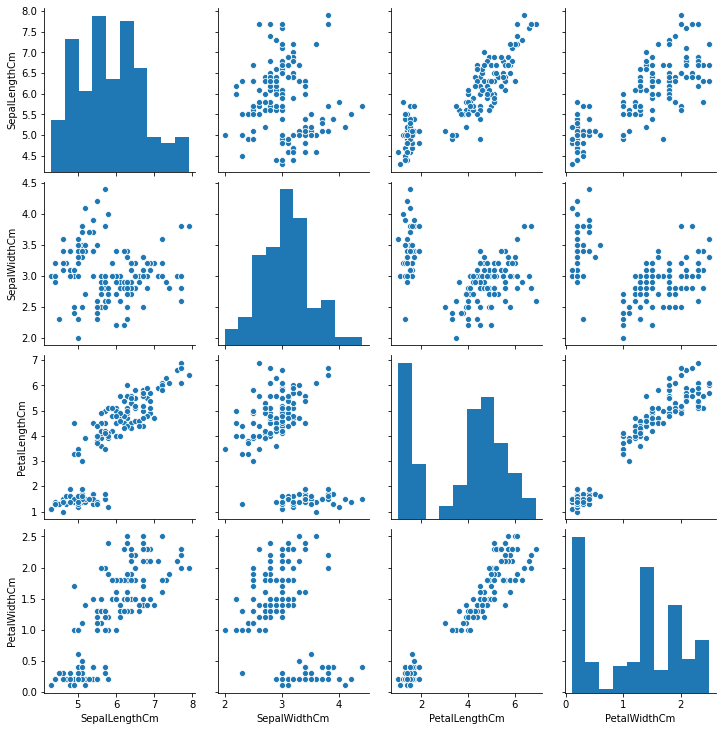

In [595]:
sns.pairplot(data);

In [596]:
# Build the model 
x = data
y = y
from sklearn .model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

print("Shape of feature training data :",x_train.shape)
print("Shape of target training data :",y_train.shape)
print("Shape of feature test data :",x_test.shape)
print("Shape of target test data :",y_test.shape)

Shape of feature training data : (105, 5)
Shape of target training data : (105,)
Shape of feature test data : (45, 5)
Shape of target test data : (45,)


In [597]:
# Dropping the Species section
df_new=data.drop(['Species'],axis=1)
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [598]:
y=data["Species"]
x=df_new

##### isna() function detects missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False

In [599]:
df_new.isna()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [600]:
data['Species'].value_counts('Normalize=1')

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64

In [601]:
x=data.iloc[:,:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [602]:
y=data.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [603]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [604]:
from sklearn.model_selection import train_test_split

In [605]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [606]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,6.5,3.0,5.8,2.2
89,5.5,2.5,4.0,1.3
116,6.5,3.0,5.5,1.8
82,5.8,2.7,3.9,1.2
112,6.8,3.0,5.5,2.1


In [607]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5,criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [608]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [609]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [610]:
confusion_matrix(y_test,y_test_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

In [611]:
confusion_matrix(y_train,y_train_pred)

array([[40,  0,  0],
       [ 0, 38,  0],
       [ 0,  0, 42]], dtype=int64)

In [612]:
accuracy_score(y_test,y_test_pred)

0.9666666666666667

##### Therefore, the accuracy is 96.66%

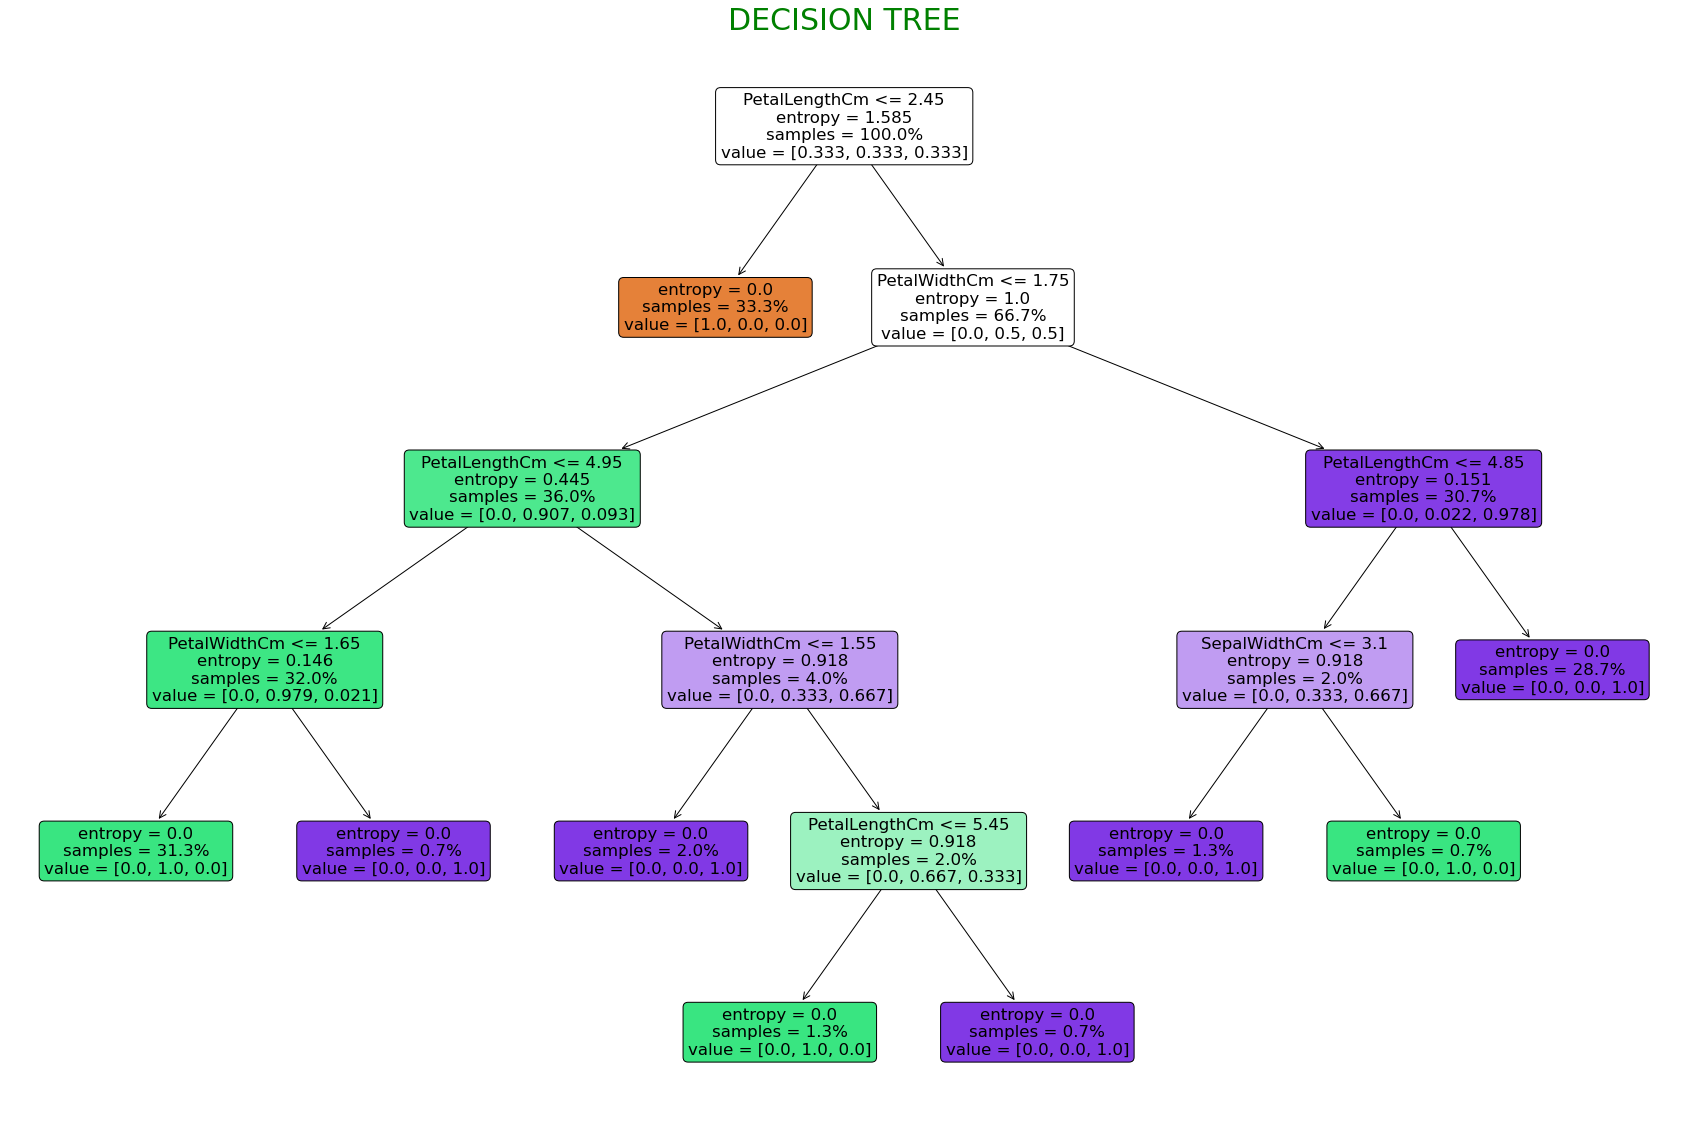

In [613]:
dtree=list(df_new.columns.values)
dtree
plt.figure(figsize=(30,20))
tree.plot_tree(tree_new.fit(x,y),feature_names=dtree,filled=True,precision=3,proportion=True,rounded=True)
plt.title("DECISION TREE",color='green',size='30')
plt.show()